In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from scipy.stats import norm

In [2]:
file_path = r"G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\DATA_03_10_2024.xlsx"
data = pd.read_excel(file_path)

In [3]:
data

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%),Erro
0,20230901_RHQ2H04,41.716498,40.4,22.144429,52.796897,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.000000,27.5,41.2,-0.516498
1,20230902_RHS6B08,47.357887,49.6,22.191493,67.361194,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.000000,29.6,41.6,-5.757887
2,20230902_RHS6F90,54.828160,50.1,23.431280,62.676540,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.000000,29.6,46.4,-8.428160
3,20230902_RHT4G96,45.270473,54.3,19.594087,76.893316,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.000000,24.0,38.0,-7.270473
4,20230904_RHQ2H05,70.687503,57.8,27.653575,51.407254,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.000000,30.9,52.4,-18.287503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,20240215_RHS6B06,44.577909,41.9,20.597115,88.774038,1.555601,2.258611,9.974098,16.337546,2.152644,5.198889,8,0.083173,22.3,36.8,-7.777909
170,20240220_RHS6F91,44.204194,51.8,21.943542,83.979167,12.778484,2.440278,9.663950,7.199588,1.208125,5.905980,14,0.120833,23.8,37.2,-7.004194
171,20240222_RHQ2H03,51.895367,58.9,24.058857,73.000000,11.092253,2.813611,8.282822,23.873651,1.963810,5.817566,12,0.000000,29.0,53.2,1.304633
172,20240226_RHS6F92,59.709741,54.6,23.718381,75.708263,8.025749,3.442500,10.503930,8.306538,1.892749,4.403178,8,0.000000,26.5,44.4,-15.309741


In [4]:
mean_temp = data['Avg_Temperature(C)'].mean()
std_temp = data['Avg_Temperature(C)'].std()

# Calcular o Coeficiente de Variação (CV)
cv = (std_temp / mean_temp) * 100

# Exibir o resultado
print(f"Coeficiente de Variação (CV): {cv:.2f}%")

Coeficiente de Variação (CV): 14.66%


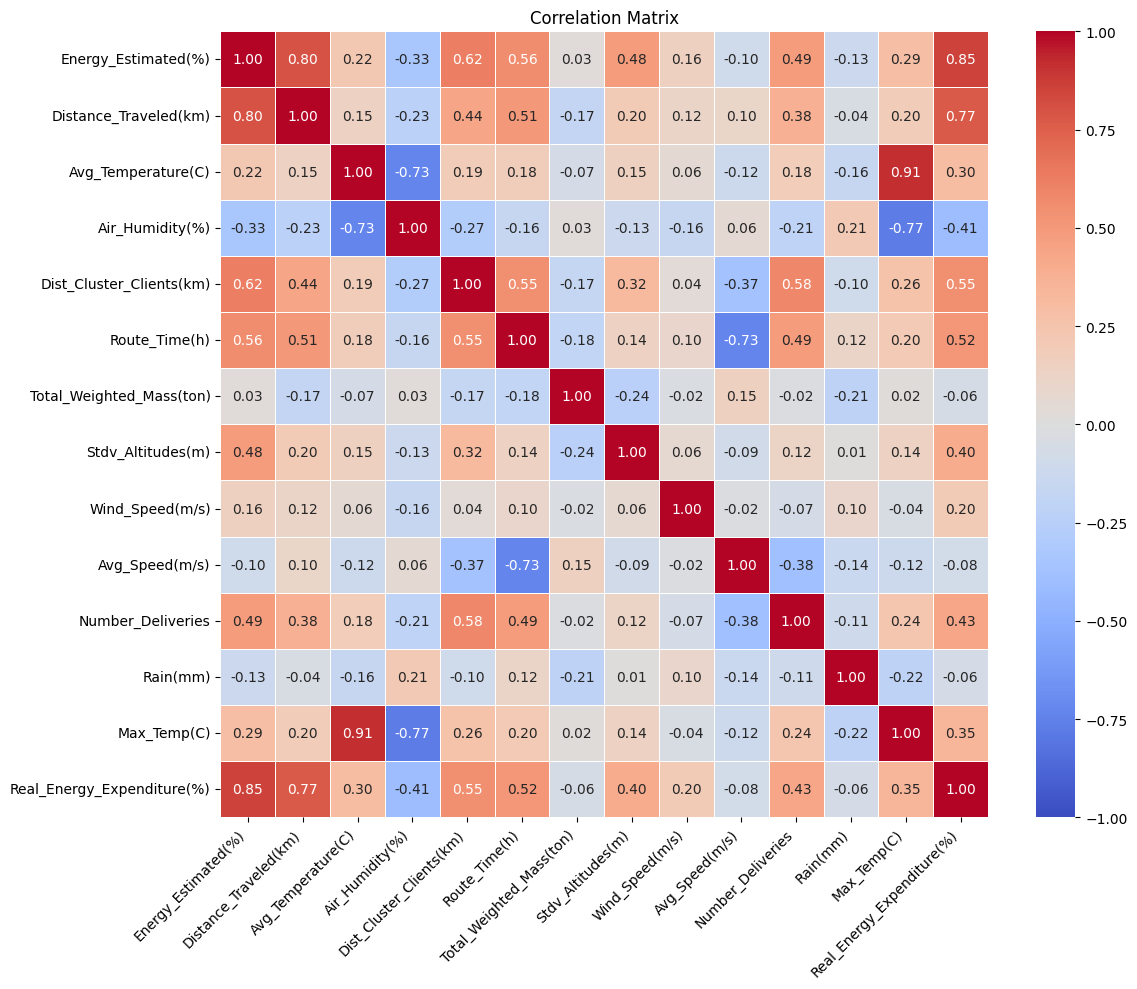

In [6]:
correlation_matrix = data.drop(columns=['ID_Rota', 'Erro']).corr()

# Configura o tamanho da figura
plt.figure(figsize=(12, 10))

# Cria o heatmap da matriz de correlações
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 10})

# Ajusta o tamanho dos rótulos
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adiciona um título
plt.title('Correlation Matrix')

# Ajusta o layout para que os rótulos não se sobreponham
plt.tight_layout()

# Salva o heatmap como um arquivo PNG
#plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

# Exibe o heatmap
plt.show()

In [9]:
X = data[['Energy_Estimated(%)','Distance_Traveled(km)', 'Air_Humidity(%)']]
y = data['Real_Energy_Expenditure(%)']

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

residuos = results.resid

print(results.summary())

                                OLS Regression Results                                
Dep. Variable:     Real_Energy_Expenditure(%)   R-squared:                       0.770
Model:                                    OLS   Adj. R-squared:                  0.766
Method:                         Least Squares   F-statistic:                     189.6
Date:                        Thu, 03 Oct 2024   Prob (F-statistic):           5.38e-54
Time:                                15:12:09   Log-Likelihood:                -505.77
No. Observations:                         174   AIC:                             1020.
Df Residuals:                             170   BIC:                             1032.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [10]:
y_pred = results.predict(X)

In [11]:
residuos = pd.Series(residuos)
residuos.replace([np.inf, -np.inf], np.nan, inplace=True)

residuos = residuos.dropna()

In [12]:
residuos

0      1.034346
1     -1.394590
2     -0.669236
3     -3.922496
4     -4.906643
         ...   
169   -0.725440
170   -2.856197
171    6.799693
172   -4.320808
173    6.121693
Length: 174, dtype: float64

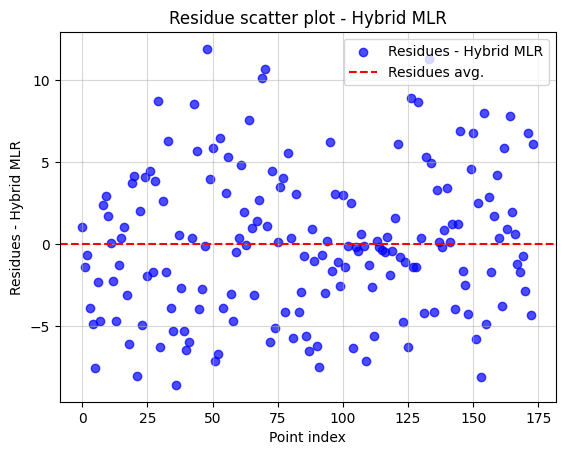

In [13]:
media_residuos = np.mean(residuos)

plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7, label='Residues - Hybrid MLR')
plt.axhline(y=media_residuos, color='red', linestyle='--', label='Residues avg.')
plt.xlabel('Point index')
plt.ylabel('Residues - Hybrid MLR')
plt.title('Residue scatter plot - Hybrid MLR')
plt.legend()
plt.grid(True, alpha=0.5)

plt.savefig('scatter_plot.png', dpi=300, bbox_inches='tight')

plt.show()

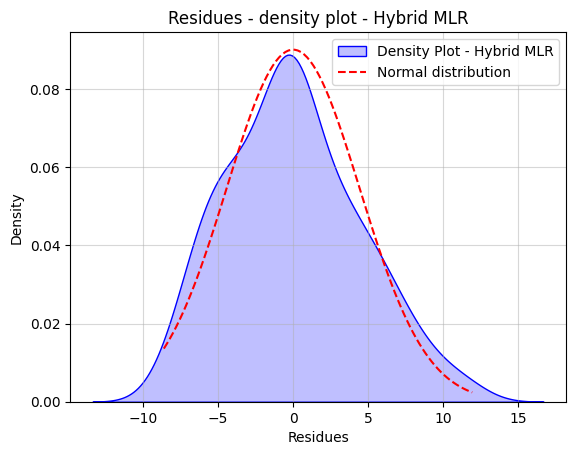

In [14]:
mean = np.mean(residuos)
std = np.std(residuos)

sns.kdeplot(residuos, fill=True, color='blue', label='Density Plot - Hybrid MLR')

x_values = np.linspace(min(residuos), max(residuos), 100)

plt.plot(x_values, norm.pdf(x_values, mean, std), color='red', linestyle='dashed', label='Normal distribution')

plt.title('Residues - density plot - Hybrid MLR')
plt.xlabel('Residues')
plt.ylabel('Density')

plt.legend()
plt.grid(True, alpha=0.5)

plt.savefig('density_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [15]:
df = pd.concat([y_pred, y, residuos], axis=1)
df.columns = ['y_pred', 'y', 'Resíduos']

df

,y_pred,y,Resíduos
0,40.165654,41.2,1.034346
1,42.994590,41.6,-1.394590
2,47.069236,46.4,-0.669236
3,41.922496,38.0,-3.922496
4,57.306643,52.4,-4.906643
...,...,...,...
169,37.525440,36.8,-0.725440
170,40.056197,37.2,-2.856197
171,46.400307,53.2,6.799693
172,48.720808,44.4,-4.320808


In [16]:
# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Estatística de teste:", shapiro_test[0])
print("Valor-p:", shapiro_test[1])

Estatística de teste: 0.982843088321896
Valor-p: 0.030662468227672223


In [17]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Suponha que você tenha ajustado um modelo de regressão e tenha os resíduos e as variáveis explicativas
# Substitua 'residuos' pelos seus resíduos e 'X' pelas suas variáveis explicativas

# Realiza o teste de Breusch-Pagan/Cook-Weisberg
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X)

# Imprime os resultados
print("Estatística LM:", lm)
print("Valor-p LM:", lm_p_value)
print("Estatística F:", fvalue)
print("Valor-p F:", f_p_value)

Estatística LM: 14.259326960984097
Valor-p LM: 0.002572595984815902
Estatística F: 5.058376883085633
Valor-p F: 0.002215257795519868


In [18]:
from scipy.stats import norm

# Calcula o teste de Durbin-Watson
durbin_watson_test = sm.stats.stattools.durbin_watson(residuos)

# Imprime o resultado
print("Estatística de Durbin-Watson:", durbin_watson_test)

nobs = len(residuos)
nvars = 3

# Calculando o valor crítico DW
d_critico = sm.stats.stattools.durbin_watson(residuos)

# Calculando DL, DU, 4-DL e 4-DU
DL = 1.521 - 1.25 * (nvars / nobs)
DU = 1.521 + 1.25 * (nvars / nobs)
quatro_DL = 4.0 - DL
quatro_DU = 4.0 - DU

# Imprimindo os resultados
print("DL:", DL)
print("DU:", DU)
print("4-DL:", quatro_DL)
print("4-DU:", quatro_DU)

Estatística de Durbin-Watson: 1.9735093511432065
DL: 1.4994482758620689
DU: 1.542551724137931
4-DL: 2.500551724137931
4-DU: 2.457448275862069


In [19]:
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"MAPE: {mape:.2f}%")

MAPE: 7.48%
